Objetivo de este modelo base: El objetivo de este proyecto es desarrollar un modelo de predicción de precios de Bitcoin con métodos de aprendizaje automático utilizando datos de series temporales. Empleando algoritmos como la regresión lineal y las máquinas de soporte vectorial (SVM) con diferentes funciones de núcleo y parámetros, el proyecto busca identificar el modelo que minimice el error en la predicción de precios de cierre de Bitcoin.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_daily = pd.read_csv('bitcoin_2017_to_2023.csv', parse_dates=['timestamp'])
df_daily.set_index('timestamp', inplace=True)

daily_data = df_daily.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'quote_asset_volume': 'sum',
    'number_of_trades': 'sum',
    'taker_buy_base_asset_volume': 'sum',
    'taker_buy_quote_asset_volume': 'sum'
})

In [3]:
df_hourly = pd.read_csv('bitcoin_2017_to_2023.csv', parse_dates=['timestamp'])
df_hourly.set_index('timestamp', inplace=True)

hourly_data = df_hourly.resample('H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'quote_asset_volume': 'sum',
    'number_of_trades': 'sum',
    'taker_buy_base_asset_volume': 'sum',
    'taker_buy_quote_asset_volume': 'sum'
})

<ipython-input-3-3cb28ced6d85>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df_hourly.resample('H').agg({


In [4]:
daily_data.shape, hourly_data.shape

((2176, 9), (52210, 9))

In [5]:
hourly_data['hour'] = hourly_data.index.hour

In [6]:
60* 24

1440

In [7]:
prediction_days = 60 * 24
train_set = hourly_data[:len(hourly_data)-prediction_days]
test_set = hourly_data[len(hourly_data)-prediction_days:]
train_set.shape, test_set.shape

((50770, 10), (1440, 10))

In [8]:
train_set = train_set.dropna()
test_set = test_set.dropna()
train_set.shape, test_set.shape

((50642, 10), (1440, 10))

In [9]:
X_train = train_set[['open', 'high', 'low', 'volume', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume','hour']]
y_train = train_set['close'].shift(-1)

In [10]:
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]

In [11]:
X_test = test_set[['open', 'high', 'low', 'volume', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume','hour']]
y_test = test_set['close'].shift(-1)

In [12]:
y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]

In [13]:
X_test

,open,high,low,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,hour
timestamp,,,,,,,,,
2023-06-02 14:00:00,26908.85,26986.08,26890.00,1685.83953,4.541820e+07,39244,905.23901,2.438875e+07,14
2023-06-02 15:00:00,26964.75,27107.34,26962.99,1248.06997,3.372657e+07,32129,664.48891,1.795662e+07,15
2023-06-02 16:00:00,27095.93,27120.02,27032.93,1402.81796,3.797328e+07,32265,691.10548,1.870719e+07,16
2023-06-02 17:00:00,27056.06,27093.82,27023.58,952.23822,2.577074e+07,24896,406.38239,1.099782e+07,17
2023-06-02 18:00:00,27057.57,27193.62,27006.22,1502.23473,4.070083e+07,39661,822.15579,2.227701e+07,18
...,...,...,...,...,...,...,...,...,...
2023-08-01 08:00:00,28937.31,28994.91,28907.04,1025.98215,2.969904e+07,21442,535.91879,1.551395e+07,8
2023-08-01 09:00:00,28994.91,28995.59,28926.82,701.68997,2.031670e+07,18388,272.62159,7.893029e+06,9
2023-08-01 10:00:00,28928.36,28946.00,28900.00,1026.03779,2.967131e+07,20151,319.02408,9.226202e+06,10


In [14]:
print("Valores faltantes en X_train:")
print(X_train.isnull().sum())

Valores faltantes en X_train:
open                            0
high                            0
low                             0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
hour                            0
dtype: int64


In [15]:
print("Valores faltantes en y_train:", y_train.isnull().sum())

Valores faltantes en y_train: 0


In [16]:
print("Valores faltantes en y_test:", y_test.isnull().sum())

Valores faltantes en y_test: 0


In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50641, 9), (50641,), (1439, 9), (1439,))

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled.shape, X_test_scaled.shape

((50641, 9), (1439, 9))

In [20]:
# Definir el número de timesteps (ventana de tiempo)
timesteps = 20

# Crear secuencias para X_train y X_test
def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:i + timesteps])  # Extrae una ventana de tiempo de tamaño "timesteps"
        ys.append(y.iloc[i + timesteps])  # Valor a predecir después de la ventana de tiempo
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, timesteps)

# Comprobación de las nuevas formas
print("Forma de X_train_seq:", X_train_seq.shape)
print("Forma de X_test_seq:", X_test_seq.shape)
print("Forma de y_train_seq:", y_train_seq.shape)
print("Forma de y_test_seq:", y_test_seq.shape)

Forma de X_train_seq: (50621, 20, 9)
Forma de X_test_seq: (1419, 20, 9)
Forma de y_train_seq: (50621,)
Forma de y_test_seq: (1419,)


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler_y = MinMaxScaler()
y_train_seq_scaled = scaler_y.fit_transform(y_train_seq.reshape(-1, 1))
y_test_seq_scaled = scaler_y.transform(y_test_seq.reshape(-1, 1))

In [22]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import time

optimizer = Adam(learning_rate=0.0001)
# Construir el modelo
regressorGRU_one_layer = Sequential()
regressorGRU_one_layer.add(GRU(units=128, return_sequences=False, input_shape=(timesteps, X_train_seq.shape[2]), activation = 'tanh'))
regressorGRU_one_layer.add(Dropout(0.4))  # Dropout después de la capa GRU
regressorGRU_one_layer.add(Dense(units=1))  # Capa de salida para predicción de un valor

# Compilar el modelo
regressorGRU_one_layer.compile(optimizer=optimizer, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=False)
# Entrenar el modelo

# Iniciar el temporizador by GPT4-o
start_time = time.time()
history_gru_one_layer = regressorGRU_one_layer.fit(X_train_seq, y_train_seq_scaled, epochs=100, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

end_time = time.time()
# Calcular y mostrar el tiempo de ejecución en minutos
execution_time_minutes = (end_time - start_time) / 60
print(f"Tiempo de ejecución del fit: {execution_time_minutes:.2f} minutos")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0404 - val_loss: 4.8480e-04
Epoch 2/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.0058 - val_loss: 1.8471e-04
Epoch 3/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0025 - val_loss: 3.9824e-04
Epoch 4/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0015 - val_loss: 1.2212e-04
Epoch 5/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0012 - val_loss: 5.0166e-05
Epoch 6/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 8.9693e-04 - val_loss: 1.3370e-04
Epoch 7/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 7.6239e-04 - val_loss: 4.8896e-05
Epoch 8/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.5896e-04 - val_loss: 5.2958e-05
Epoch 9/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 5.6471e-04 - val_loss: 2.2151e-05
Epoch 10/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.2385e-04 - val_loss: 7.7757e-05
Epoch 11/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━

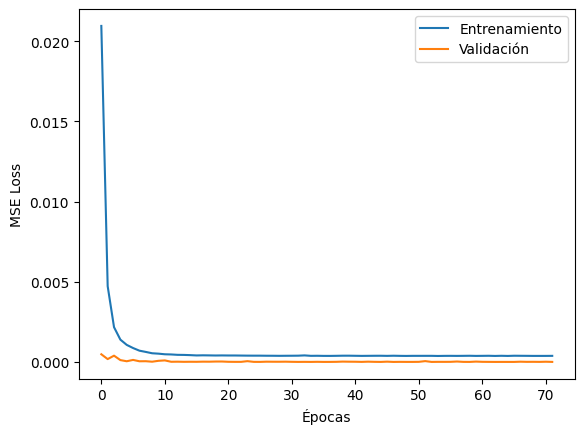

In [23]:
plt.plot(history_gru_one_layer.history['loss'], label='Entrenamiento')
plt.plot(history_gru_one_layer.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [24]:
y_pred_scaled_gru_one_layer = regressorGRU_one_layer.predict(X_test_seq)
y_pred_gru_one_layer = scaler_y.inverse_transform(y_pred_scaled_gru_one_layer)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [25]:
mse_gru = mean_squared_error(y_test_seq_scaled, y_pred_scaled_gru_one_layer)
mae_gru  = mean_absolute_error(y_test_seq_scaled, y_pred_scaled_gru_one_layer)

In [26]:
print("Resultados de GRU one layer:")
print(f"MSE: {mse_gru:.6f}")
print(f"MAE: {mae_gru:.6f}\n")

Resultados de GRU one layer:
MSE: 0.000011
MAE: 0.002570



In [27]:
regressorGRU_one_layer.save('gru_one_layer.h5')

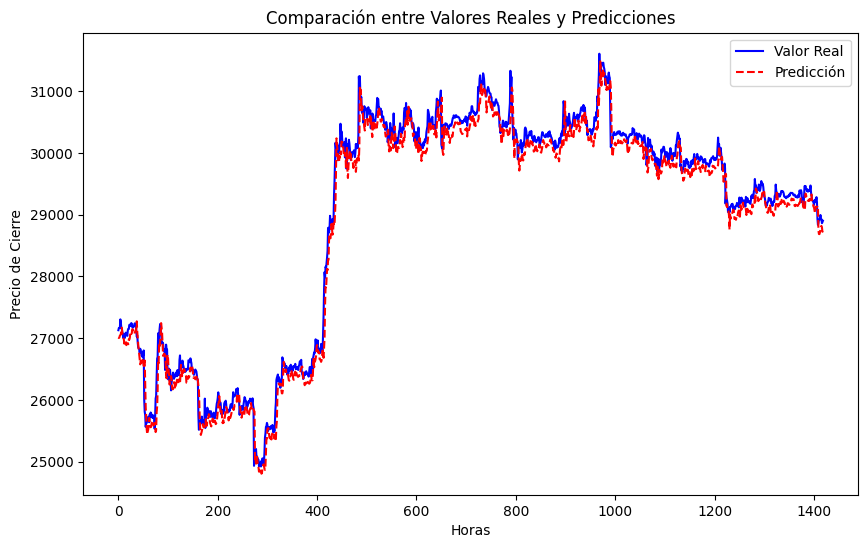

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Valor Real', color='blue')
plt.plot(y_pred_gru_one_layer, label='Predicción', color='red', linestyle='dashed')
plt.xlabel('Horas')
plt.ylabel('Precio de Cierre')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()


In [30]:
optimizer = Adam(learning_rate=0.0001)
# Construir el modelo
regressorGRU_two_layer = Sequential()
regressorGRU_two_layer.add(GRU(units=128, return_sequences=True, input_shape=(timesteps, X_train_seq.shape[2]), activation = 'tanh'))
regressorGRU_two_layer.add(Dropout(0.4))  # Dropout después de la capa GRU
regressorGRU_two_layer.add(GRU(units=64, return_sequences=False, activation='tanh'))  # Segunda capa GRU
regressorGRU_two_layer.add(Dropout(0.4))
regressorGRU_two_layer.add(Dense(units=1))  # Capa de salida para predicción de un valor

# Compilar el modelo
regressorGRU_two_layer.compile(optimizer=optimizer, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=False)
# Entrenar el modelo

# Iniciar el temporizador by GPT4-o
start_time = time.time()
history_gru_two_layer = regressorGRU_two_layer.fit(X_train_seq, y_train_seq_scaled, epochs=100, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

end_time = time.time()
# Calcular y mostrar el tiempo de ejecución en minutos
execution_time_minutes = (end_time - start_time) / 60
print(f"Tiempo de ejecución del fit: {execution_time_minutes:.2f} minutos")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0286 - val_loss: 3.4105e-04
Epoch 2/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 3/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.0027 - val_loss: 1.0181e-04
Epoch 4/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0020 - val_loss: 1.4217e-04
Epoch 5/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0016 - val_loss: 2.3073e-05
Epoch 6/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0014 - val_loss: 2.1935e-05
Epoch 7/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0012 - val_loss: 2.2067e-05
Epoch 8/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0011 - val_loss: 1.5918e-04
Epoch 9/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 9.8399e-04 - val_loss: 2.2390e-05
Epoch 10/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 9.5337e-04 - val_loss: 7.0960e-05
Epoch 11/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step -

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Resultados de GRU two layer:
MSE: 0.000088
MAE: 0.008904



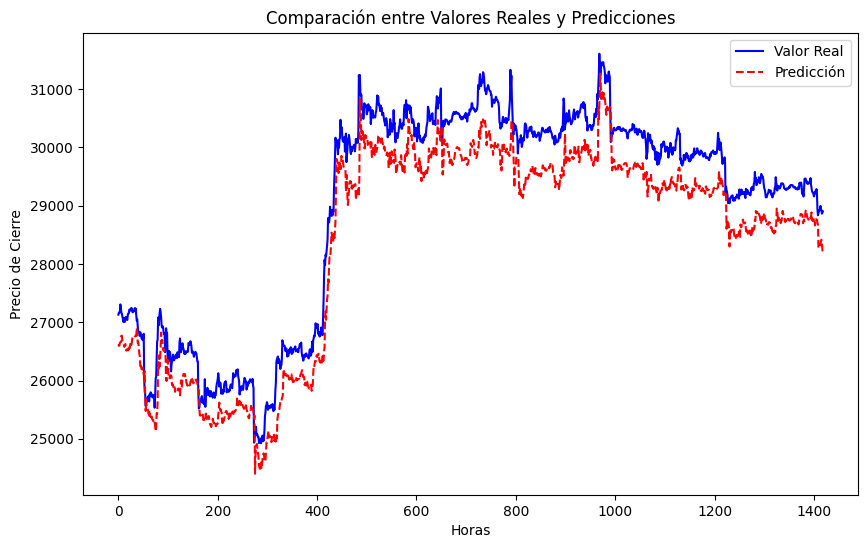

In [31]:
y_pred_scaled_gru_two_layer = regressorGRU_two_layer.predict(X_test_seq)
y_pred_gru_two_layer = scaler_y.inverse_transform(y_pred_scaled_gru_two_layer)
mse_gru = mean_squared_error(y_test_seq_scaled, y_pred_scaled_gru_two_layer)
mae_gru  = mean_absolute_error(y_test_seq_scaled, y_pred_scaled_gru_two_layer)
print("Resultados de GRU two layer:")
print(f"MSE: {mse_gru:.6f}")
print(f"MAE: {mae_gru:.6f}\n")
regressorGRU_two_layer.save('gru_two_layer.h5')

plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Valor Real', color='blue')
plt.plot(y_pred_gru_two_layer, label='Predicción', color='red', linestyle='dashed')
plt.xlabel('Horas')
plt.ylabel('Precio de Cierre')
plt.title('Comparación entre Valores Reales y Predicciones')
plt.legend()
plt.show()

## LSTM

In [32]:
from keras.layers import GRU, Dense, Dropout, LSTM
optimizer = Adam(learning_rate=0.0001)
# Construir el modelo
regressorLSTM_one_layer = Sequential()
regressorLSTM_one_layer.add(LSTM(units=128, return_sequences=False, input_shape=(timesteps, X_train_seq.shape[2]), activation = 'tanh'))
regressorLSTM_one_layer.add(Dropout(0.4))  # Dropout después de la capa GRU
regressorLSTM_one_layer.add(Dense(units=1))  # Capa de salida para predicción de un valor

# Compilar el modelo
regressorLSTM_one_layer.compile(optimizer=optimizer, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=False)
# Entrenar el modelo

# Iniciar el temporizador by GPT4-o
start_time = time.time()
history_lstm_one_layer = regressorLSTM_one_layer.fit(X_train_seq, y_train_seq_scaled, epochs=100, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

end_time = time.time()
# Calcular y mostrar el tiempo de ejecución en minutos
execution_time_minutes = (end_time - start_time) / 60
print(f"Tiempo de ejecución del fit: {execution_time_minutes:.2f} minutos")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0198 - val_loss: 2.5259e-04
Epoch 2/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0025 - val_loss: 2.0158e-04
Epoch 3/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0014 - val_loss: 1.5185e-04
Epoch 4/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 9.4678e-04 - val_loss: 9.2165e-05
Epoch 5/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 7.8926e-04 - val_loss: 1.1724e-04
Epoch 6/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 6.5920e-04 - val_loss: 7.9234e-05
Epoch 7/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.8991e-04 - val_loss: 4.8550e-05
Epoch 8/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 5.3019e-04 - val_loss: 3.1788e-05
Epoch 9/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 5.1828e-04 - val_loss: 6.0292e-05
Epoch 10/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 4.7196e-04 - val_loss: 4.0359e-05
Epoch 11/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/s

In [33]:
y_pred_scaled_lstm_one_layer = regressorLSTM_one_layer.predict(X_test_seq)
y_pred_lstm_one_layer = scaler_y.inverse_transform(y_pred_scaled_lstm_one_layer)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Resultados de LSTM:
MSE: 0.000009
MAE: 0.002188



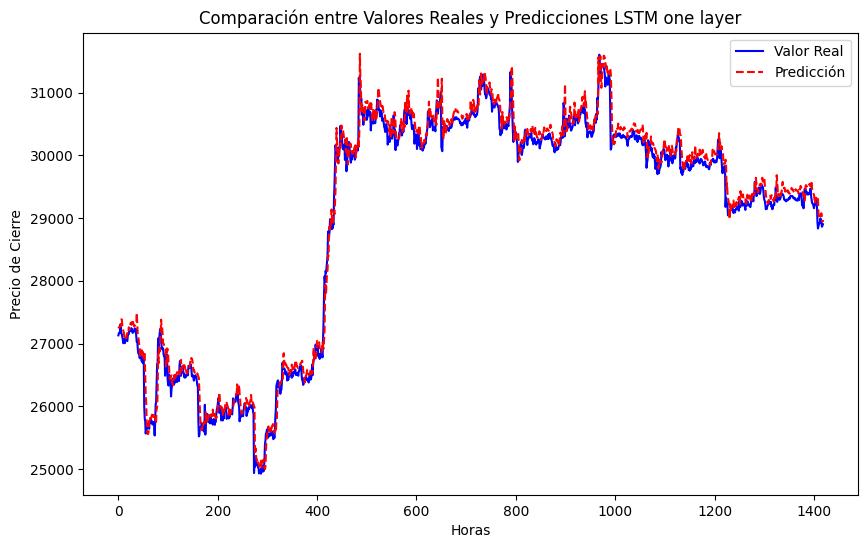

In [34]:
mse_lstm = mean_squared_error(y_test_seq_scaled, y_pred_scaled_lstm_one_layer)
mae_lstm  = mean_absolute_error(y_test_seq_scaled, y_pred_scaled_lstm_one_layer)

print("Resultados de LSTM:")
print(f"MSE: {mse_lstm:.6f}")
print(f"MAE: {mae_lstm:.6f}\n")
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Valor Real', color='blue')
plt.plot(y_pred_lstm_one_layer, label='Predicción', color='red', linestyle='dashed')
plt.xlabel('Horas')
plt.ylabel('Precio de Cierre')
plt.title('Comparación entre Valores Reales y Predicciones LSTM one layer')
plt.legend()
plt.show()


In [35]:
regressorLSTM_one_layer.save('lstm_one_layer.h5')

In [37]:
optimizer = Adam(learning_rate=0.0001)
# Construir el modelo
regressorLSTM_two_layer = Sequential()
regressorLSTM_two_layer.add(LSTM(units=128, return_sequences=True, input_shape=(timesteps, X_train_seq.shape[2]), activation = 'tanh'))
regressorLSTM_two_layer.add(Dropout(0.4))  # Dropout
regressorLSTM_two_layer.add(LSTM(units=64, return_sequences=False, activation='tanh'))  # Segunda capa
regressorLSTM_two_layer.add(Dropout(0.4))
regressorLSTM_two_layer.add(Dense(units=1))  # Capa de salida para predicción de un valor

# Compilar el modelo
regressorLSTM_two_layer.compile(optimizer=optimizer, loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=False)
# Entrenar el modelo

# Iniciar el temporizador by GPT4-o
start_time = time.time()
history_lstm_two_layer = regressorLSTM_two_layer.fit(X_train_seq, y_train_seq_scaled, epochs=100, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

end_time = time.time()
# Calcular y mostrar el tiempo de ejecución en minutos
execution_time_minutes = (end_time - start_time) / 60
print(f"Tiempo de ejecución del fit: {execution_time_minutes:.2f} minutos")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0124 - val_loss: 7.5783e-04
Epoch 2/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0026 - val_loss: 9.3470e-05
Epoch 3/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0019 - val_loss: 1.4985e-04
Epoch 4/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0014 - val_loss: 4.2565e-05
Epoch 5/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0012 - val_loss: 6.6609e-05
Epoch 6/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0011 - val_loss: 9.7436e-05
Epoch 7/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.0010 - val_loss: 5.1057e-05
Epoch 8/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0010 - val_loss: 2.6454e-05
Epoch 9/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 9.5230e-04 - val_loss: 2.2544e-05
Epoch 10/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 9.1796e-04 - val_loss: 1.9425e-05
Epoch 11/100
1424/1424 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/s

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Resultados de GRU two layer:
MSE: 0.000013
MAE: 0.002422



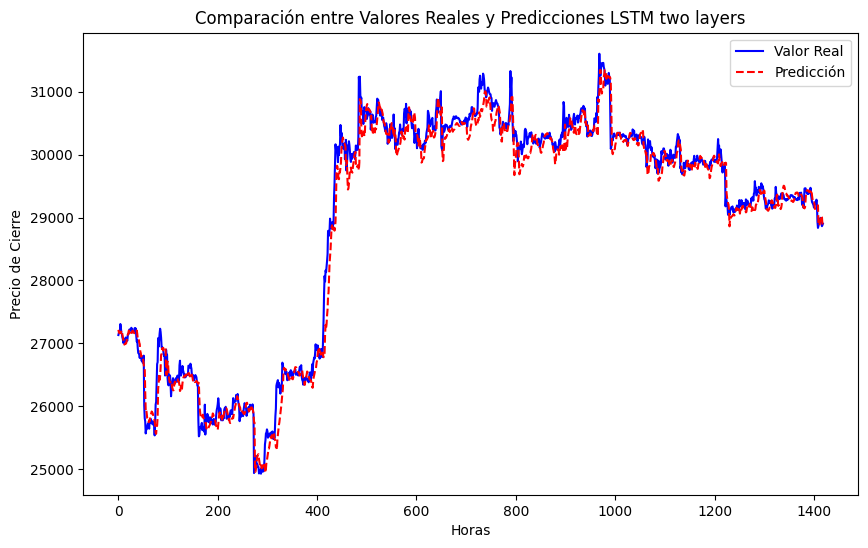

In [38]:
y_pred_scaled_lstm_two_layer = regressorLSTM_two_layer.predict(X_test_seq)
y_pred_lstm_two_layer = scaler_y.inverse_transform(y_pred_scaled_lstm_two_layer)
mse_gru = mean_squared_error(y_test_seq_scaled, y_pred_scaled_lstm_two_layer)
mae_gru  = mean_absolute_error(y_test_seq_scaled, y_pred_scaled_lstm_two_layer)
print("Resultados de GRU two layer:")
print(f"MSE: {mse_gru:.6f}")
print(f"MAE: {mae_gru:.6f}\n")
regressorLSTM_two_layer.save('lstm_two_layer.h5')

plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Valor Real', color='blue')
plt.plot(y_pred_lstm_two_layer, label='Predicción', color='red', linestyle='dashed')
plt.xlabel('Horas')
plt.ylabel('Precio de Cierre')
plt.title('Comparación entre Valores Reales y Predicciones LSTM two layers')
plt.legend()
plt.show()

## Todos los modelos comparados

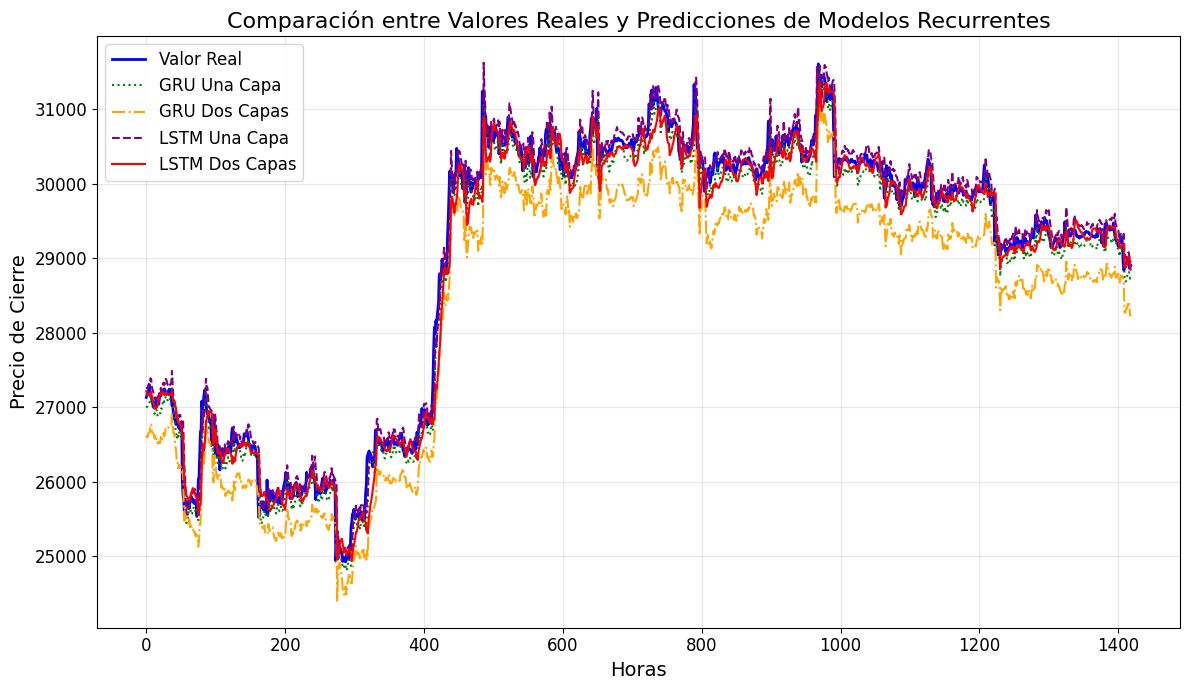

In [39]:
# By GPT4-o
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Colores y estilos diferenciados para cada modelo
plt.plot(y_test_seq, label='Valor Real', color='blue', linewidth=2)
plt.plot(y_pred_gru_one_layer, label='GRU Una Capa', color='green', linestyle='dotted', linewidth=1.5)
plt.plot(y_pred_gru_two_layer, label='GRU Dos Capas', color='orange', linestyle='dashdot', linewidth=1.5)
plt.plot(y_pred_lstm_one_layer, label='LSTM Una Capa', color='purple', linestyle='dashed', linewidth=1.5)
plt.plot(y_pred_lstm_two_layer, label='LSTM Dos Capas', color='red', linestyle='solid', linewidth=1.5)

# Etiquetas más descriptivas
plt.xlabel('Horas', fontsize=14)
plt.ylabel('Precio de Cierre', fontsize=14)
plt.title('Comparación entre Valores Reales y Predicciones de Modelos Recurrentes', fontsize=16)

# Leyenda y cuadrícula mejorada
plt.legend(fontsize=12, loc='best')
plt.grid(alpha=0.3)

# Personalización del estilo de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

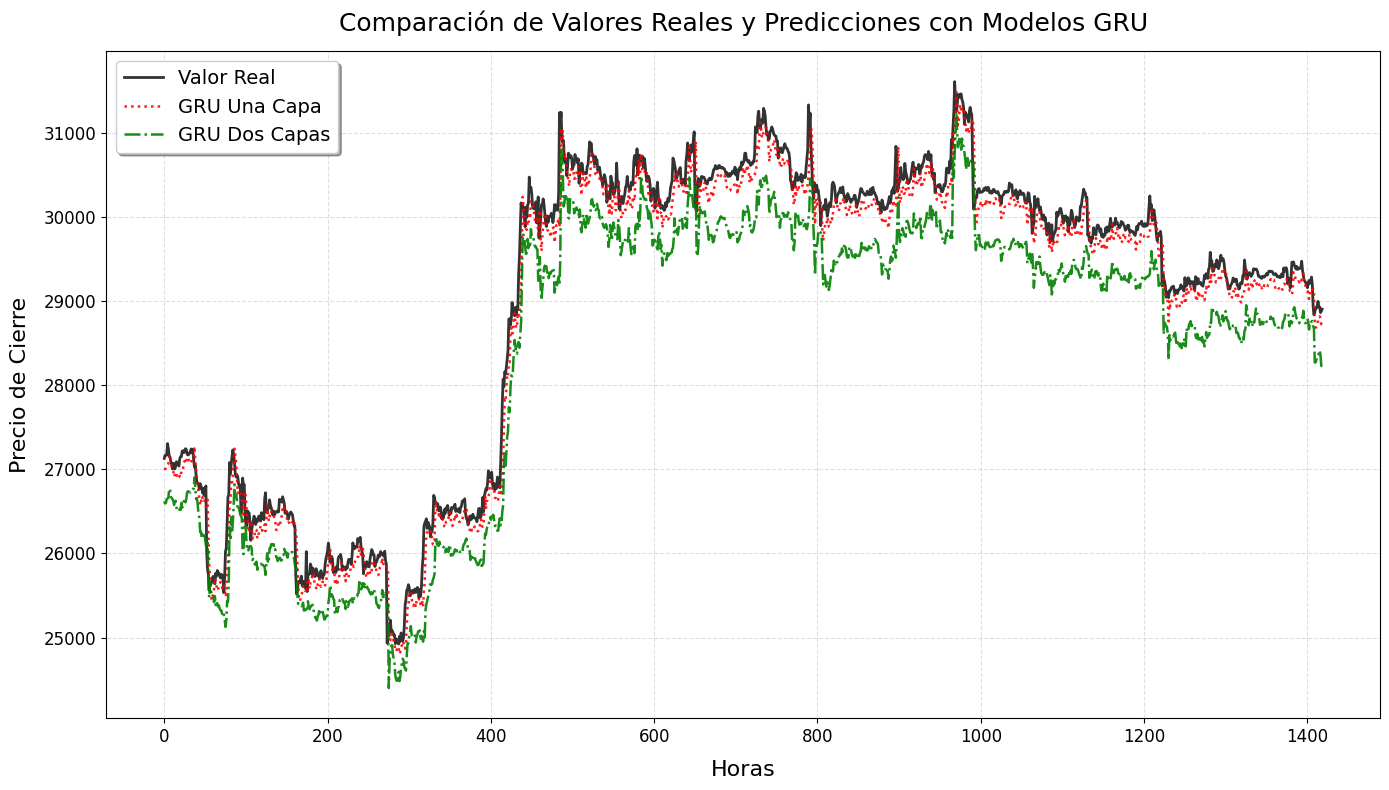

In [40]:
# By GPT4-o
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Colores y estilos diferenciados para cada modelo
plt.plot(y_test_seq, label='Valor Real', color='black', linewidth=2, alpha=0.8)
plt.plot(y_pred_gru_one_layer, label='GRU Una Capa', color='red', linestyle='dotted', linewidth=1.8, alpha=0.9)
plt.plot(y_pred_gru_two_layer, label='GRU Dos Capas', color='green', linestyle='dashdot', linewidth=1.8, alpha=0.9)

# Etiquetas más descriptivas
plt.xlabel('Horas', fontsize=16, labelpad=10)
plt.ylabel('Precio de Cierre', fontsize=16, labelpad=10)
plt.title('Comparación de Valores Reales y Predicciones con Modelos GRU', fontsize=18, pad=15)

# Leyenda y cuadrícula mejorada
plt.legend(fontsize=14, loc='upper left', frameon=True, shadow=True, fancybox=True)
plt.grid(alpha=0.4, linestyle='--')

# Personalización del estilo de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mejorar el rango visual del gráfico para incluir márgenes
plt.tight_layout()

plt.show()

### Documento desarrollado con ayuda de foros y ChatGPT